Image Segmentation using Clustering

In this assignment, I applied Binary Thresholding, K-means algorithm, and Mean-Shift algorithm for image segmentation.

The task has two parts.

Part 1:
1. Using an image of the choice.
2. Apply binary thresholding using OpenCV with different methods ( THRESH_BINARY and THRESH_BINARY_INV) .
3. Find contours from one of the binary thresholded images in step 1 which you think is the best-thresholded image.
4. Draw contours on the image and show it.
5. Explain what other thresholding techniques can be used to optimize the quality of the contours.
6. Implement two additional thresholding techniques and show the results for each one.
7. Output thresholded image, contours only (overlay on a blank/white image),and contours on the original image for all of the thresholding methods above all in the same plot. Must place the image in the root directory of your repository and the code must be able to load the image.

Part 2:
1. Using a colored image of your choice, apply the K-means algorithm and report the output using two different values of k (your choice).
   Must place the image in the root directory of your repository and code must be able to load the image.
2. Using the elbow method, identify the optimal value of k and report your result, and explain the notice.
3. Using the same image as in 1, now apply the Mean-Shift clustering algorithm and report the results.
4. Explain some differences between K-means and Mean-Shift.
5. Explain some of their limitations.


Part 1

1) Using an image of the choice.

The image is from COCO2017 dataset. The link is https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset. place the image in the root directory with the notebook.

I read the image and convert it to grayscale format.

In [19]:
#import libs
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#read the image by cv2
image_src = cv2.imread('boats.jpg')
image_rgb = cv2.cvtColor(image_src,cv2.COLOR_BGR2RGB)
# convert the image to grayscale format
image_gray = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)


2) Apply binary thresholding using OpenCV with different methods ( THRESH_BINARY and THRESH_BINARY_INV) .

In [21]:
#plot the prediction of the images
def plotimages(plot_shape,images, titles,):
    # Create a nxm grid of subplots
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=(15, 15))
    axes = axes.flatten()
    # Loop through the subplots and plot each image
    for j, ax in enumerate(axes):
        if(j==0 and titles[j]=='source image'):
            ax.imshow(images[j])
        else:
            ax.imshow(images[j],cmap='gray')
        ax.set_title(titles[j])
        ax.axis('off')
    # Display the plot
    plt.tight_layout()
    plt.show()

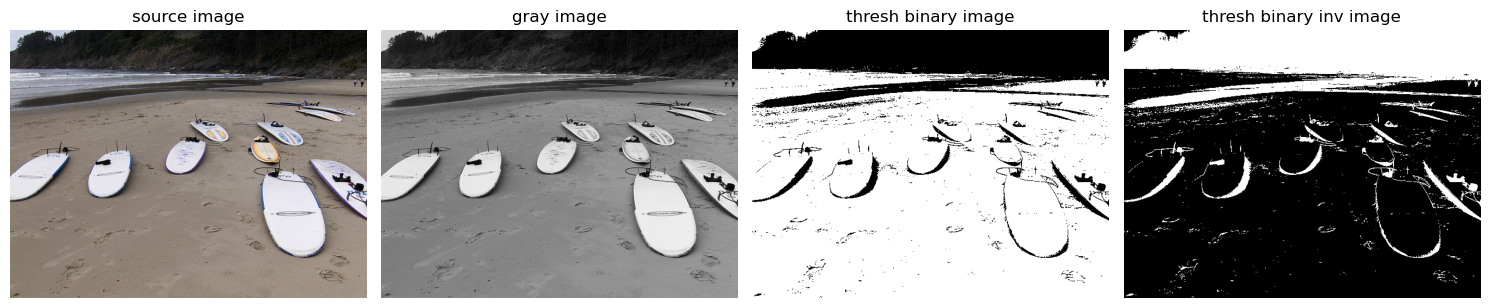

In [22]:

# apply THRESH_BINARY
ret_bt, image_thresh_binary = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)

#apply THRESH_BINARY_INV
ret_bti, image_thresh_binary_inv = cv2.threshold(image_gray,100,255,cv2.THRESH_BINARY_INV)

# visualize the binary image
plt_shape = [1,4]
images = [image_rgb,image_gray,image_thresh_binary,image_thresh_binary_inv]
titles = ['source image','gray image','thresh binary image', 'thresh binary inv image']
plotimages(plt_shape,images,titles)

3) Find contours from one of the binary thresholded images in step 1 which you think is the best-thresholded image.

I chose finding the contous on the thresh binary image.

In [23]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(image=image_thresh_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
                                      
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy = image_rgb.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)    


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 15,  15,  13],
        [ 14,  12,  13],
        [  9,   7,   8]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0,   0,   0],
        [  3,   1,   2],
        [  5,   3,   4]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [122, 230, 137],
        ...,
        [  6,   6,   4],
        [ 12,  10,  11],
        [ 16,  14,  15]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 98, 186,  82],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

4) Draw contours on the image and show it.

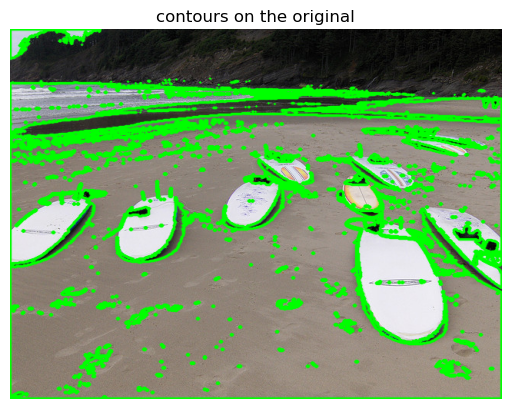

In [24]:
plt.axis('off')
plt.title('contours on the original')
plt.imshow(image_copy)

5) Explain what other thresholding techniques can be used to optimize the quality of the contours.

(1) Otsu's thresholding: This method calculates an optimal threshold value based on the intensity histogram of the image. It minimizes the intra-class variance, which results in better separation of object and background pixels.

(2) Adaptive thresholding: This technique adjusts the threshold value for different regions of the image, taking into account local variations in intensity. It can improve the quality of contours in regions with varying illumination or contrast.

(3) Dynamic thresholding: This method adapts the threshold value dynamically during the contour detection process. It updates the threshold value based on the current pixel intensity and the intensity values of neighboring pixels. This can result in more accurate contour detection in areas with varying intensity levels.

(4) Edge-based thresholding: This technique uses edge information to determine the threshold value. It detects edges in the image and uses them as a reference for thresholding. This can improve the accuracy of contour detection in regions with sharp edges or boundaries.

(5) Color-based thresholding: If the image has color information, color-based thresholding can be used to segment objects based on their color properties. This can be useful for images with objects of different colors or for applications that require color-based object recognition.

(6) Morphological thresholding: This technique uses morphological operations, such as erosion and dilation, to optimize the quality of contours. It can be used to smooth or fill gaps in the contours, resulting in more accurate and continuous contour outlines.

(7) Texture-based thresholding: This method uses texture features, such as texture energy or entropy, to determine the threshold value. It can be useful for images with textured regions or for applications that require texture-based object recognition.

6) Implement two additional thresholding techniques and show the results for each one.

I used Otsu's thresholding and Adaptive thresholding to binary threshold the image and find the contours.

In [25]:
def thresh_contour(img_rgb,img_gray,thresh_method):
    ret_thresh, image_thresh =  cv2.threshold(img_gray, 100, 255, thresh_method)
    # detect the contours on the binary image using cv2.CHAIN_APPROX_SIMPLE
    contours_thresh, hierarchy_thresh = cv2.findContours(image=image_thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
    # draw contours on the original image for `CHAIN_APPROX_SIMPLE`
    image_show = img_rgb.copy()
    cv2.drawContours(image=image_show, contours=contours_thresh, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)  

    # Create a black image with dimensions same to source image
    black_image = np.zeros(image_rgb.shape, np.uint8)
    cv2.drawContours(image=black_image, contours=contours_thresh, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)  
    return image_thresh,image_show,black_image

# apply THRESH_OTSU, and get the contours
image_OTSU, contuors_OTSU, black_contours_OTSU= thresh_contour(image_rgb,image_gray,cv2.THRESH_OTSU)

# apply TRIANGLE, and get the contours
image_triangle, contours_triangle, black_contours_triangle = thresh_contour(image_rgb,image_gray,cv2.THRESH_TRIANGLE)


7) Output thresholded image, contours only (overlay on a blank/white image),and contours on the original image for all of the thresholding methods above all in the same plot. Must place the image in the root directory of your repository and the code must be able to load the image.

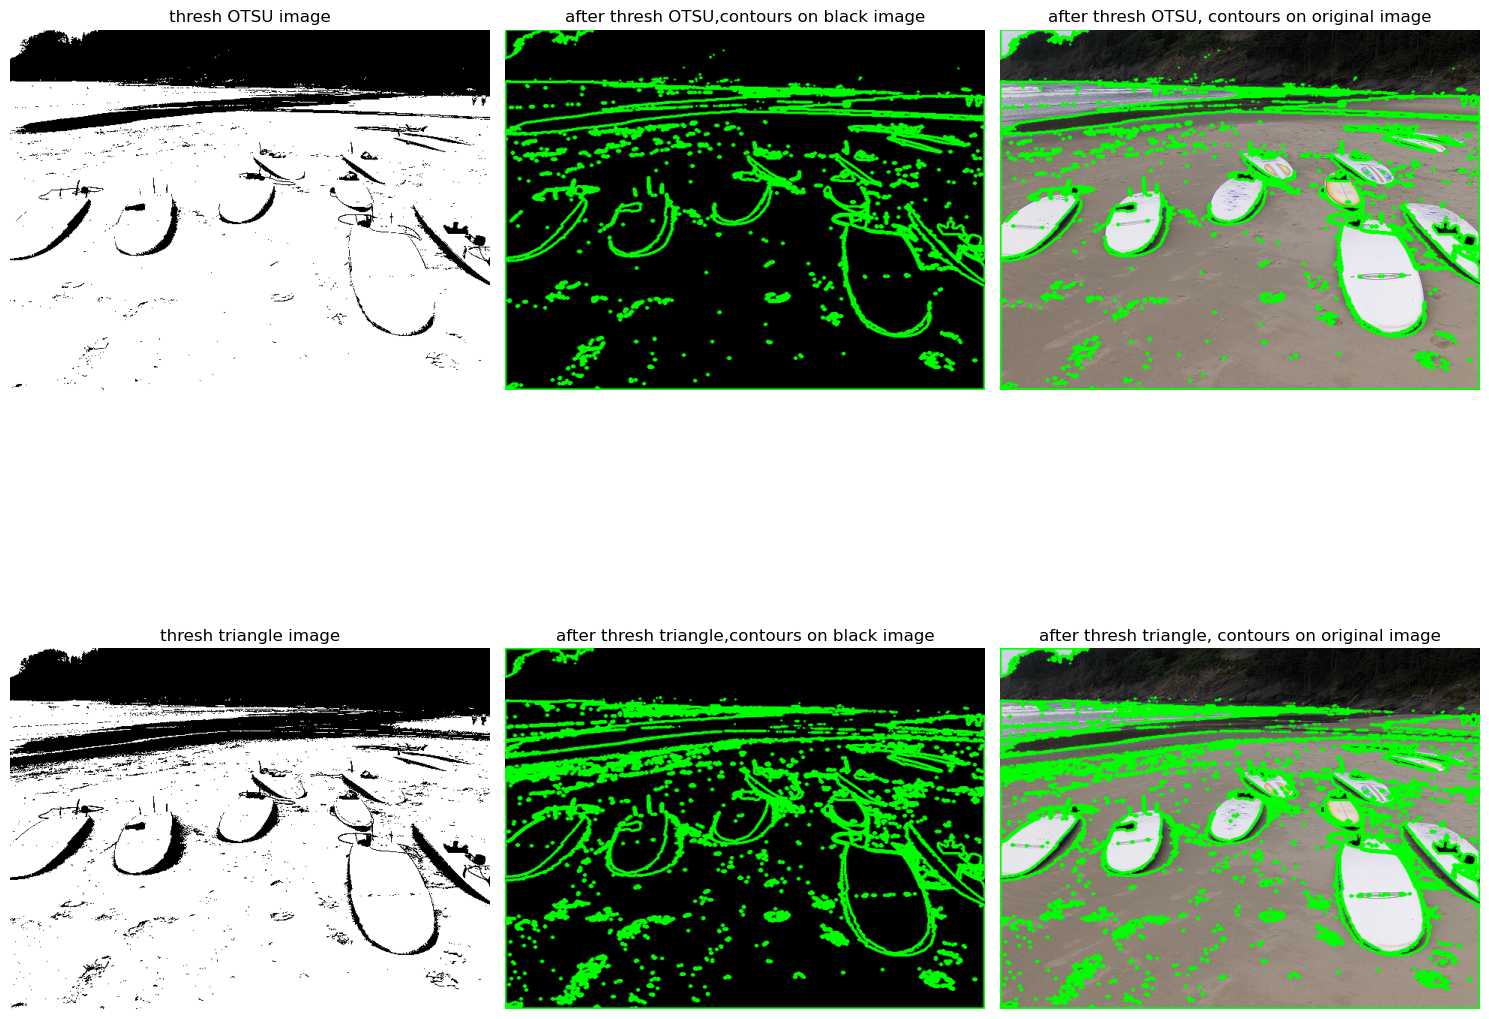

In [26]:
# visualize the binary image
plt_shape = [2,3]
images = [image_OTSU,black_contours_OTSU,contuors_OTSU,image_triangle,black_contours_triangle,contours_triangle]
titles = ['thresh OTSU image', 'after thresh OTSU,contours on black image','after thresh OTSU, contours on original image',
          'thresh triangle image','after thresh triangle,contours on black image','after thresh triangle, contours on original image']
#save the images 
plt.imsave('thresh_otsu.jpg',image_OTSU)
plt.imsave('otsu_contours_black_image.jpg',black_contours_OTSU)
plt.imsave('otsu_contours_original_image.jpg',contuors_OTSU)

plt.imsave('thresh_triangle.jpg',image_triangle)
plt.imsave('triangle_contours_black_image.jpg',black_contours_triangle)
plt.imsave('triangle_contours_original_image.jpg',contours_triangle)

plotimages(plt_shape,images,titles)

Part 2:

1) Using a colored image of your choice, apply the K-means algorithm and report the output using two different values of k (your choice).
   Must place the image in the root directory of your repository and code must be able to load the image.

(1)The image is from COCO2017 dataset. The link is https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset. place the image in the root directory with the notebook.

In [27]:
# import libs
#import numpy as np
#import matplotlib.pyplot as plt
#import cv2
import pandas as pd
import collections
import seaborn as sns

from skimage import filters
from skimage import util
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, estimate_bandwidth
import warnings
warnings.filterwarnings("ignore")

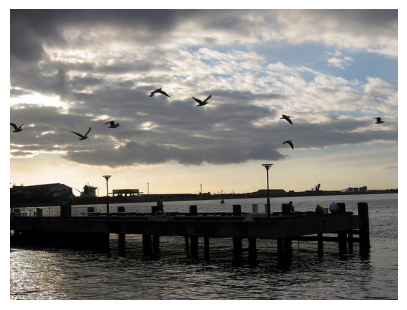

In [28]:
img_kmeans_src = cv2.imread('birds.jpg')
img_kmeans_rgb = cv2.cvtColor(img_kmeans_src ,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(img_kmeans_rgb,cmap='gray')

(2) apply the K-means algorithm and report the output using two different values of k

In [29]:
#Next, converts the HxWx3 image into a Kx3 matrix where K=HxW and each row is now a vector in the 3-D space of RGB.
vectorized_img = img_kmeans_rgb.reshape((-1,3))

#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.
vectorized_k_img= np.float32(vectorized_img)
vectorized_k_img

array([[56., 56., 66.],
       [57., 57., 65.],
       [57., 58., 63.],
       ...,
       [21., 17., 16.],
       [25., 17., 15.],
       [32., 21., 19.]], dtype=float32)

In [30]:
def get_k_means_by_manual(vector_k_img,K):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts=10
    ret,label,center=cv2.kmeans(vector_k_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)
    center
    #Next, we have to access the labels to regenerate the clustered image
    res = center[label.flatten()]
    result_image = res.reshape((img_kmeans_rgb.shape))
    return result_image


# set K=3
k_means_result_3 = get_k_means_by_manual(vectorized_k_img,3)

# set K=8
k_means_result_8 = get_k_means_by_manual(vectorized_k_img,8)

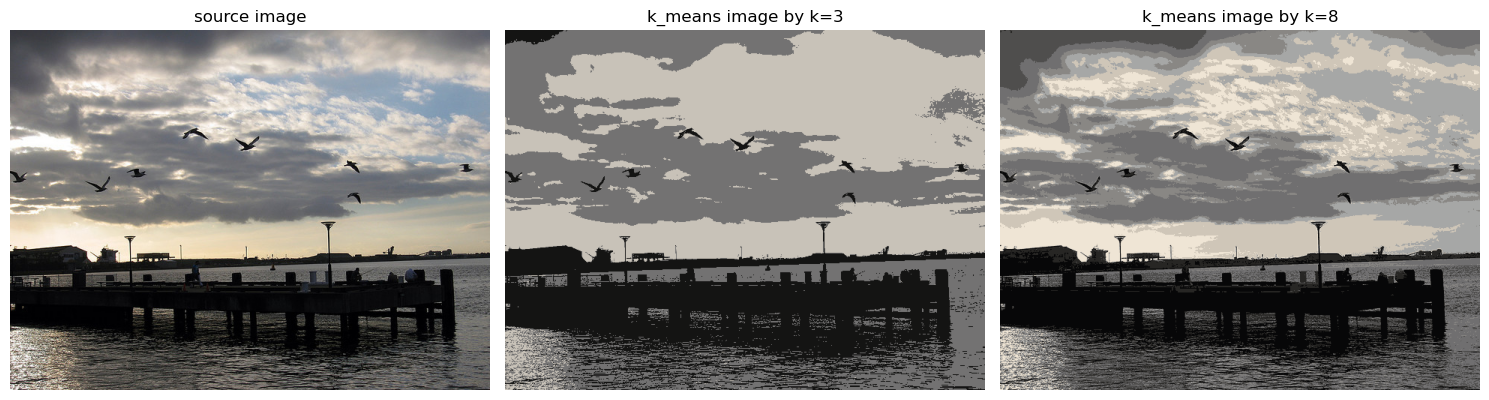

In [31]:
# visualize the result
plt_shape = [1,3]
images = [img_kmeans_rgb,k_means_result_3,k_means_result_8]
titles = ['source image','k_means image by k=3','k_means image by k=8']
plotimages(plt_shape,images,titles)

2) Using the elbow method, identify the optimal value of k and report the result, and explain the notice.


In [32]:
image_elbow = plt.imread('birds.jpg')

# df_1 : Vector which have RGB pixel values and their location on the image
index = pd.MultiIndex.from_product(
    (*map(range, image_elbow.shape[:2]), ('r', 'g', 'b')),
    names=('row', 'col', None))
df_1 = pd.Series(image_elbow.flatten(), index=index)
df_1 = df_1.unstack()
df_1 = df_1.reset_index().reindex(columns=['col','row',   'r','g','b'])
df_1.head(10)

col  row   r   g   b
0    0    0  56  56  66
1    1    0  57  57  65
2    2    0  57  58  63
3    3    0  57  58  63
4    4    0  56  57  62
5    5    0  55  56  61
6    6    0  54  54  62
7    7    0  54  54  64
8    8    0  58  57  63
9    9    0  57  58  63

In [33]:
# df_2: Vector which have only image RGB pixels.
df_2 = df_1[['r','g', 'b']]
df_2.head(10)

r   g   b
0  56  56  66
1  57  57  65
2  57  58  63
3  57  58  63
4  56  57  62
5  55  56  61
6  54  54  62
7  54  54  64
8  58  57  63
9  57  58  63

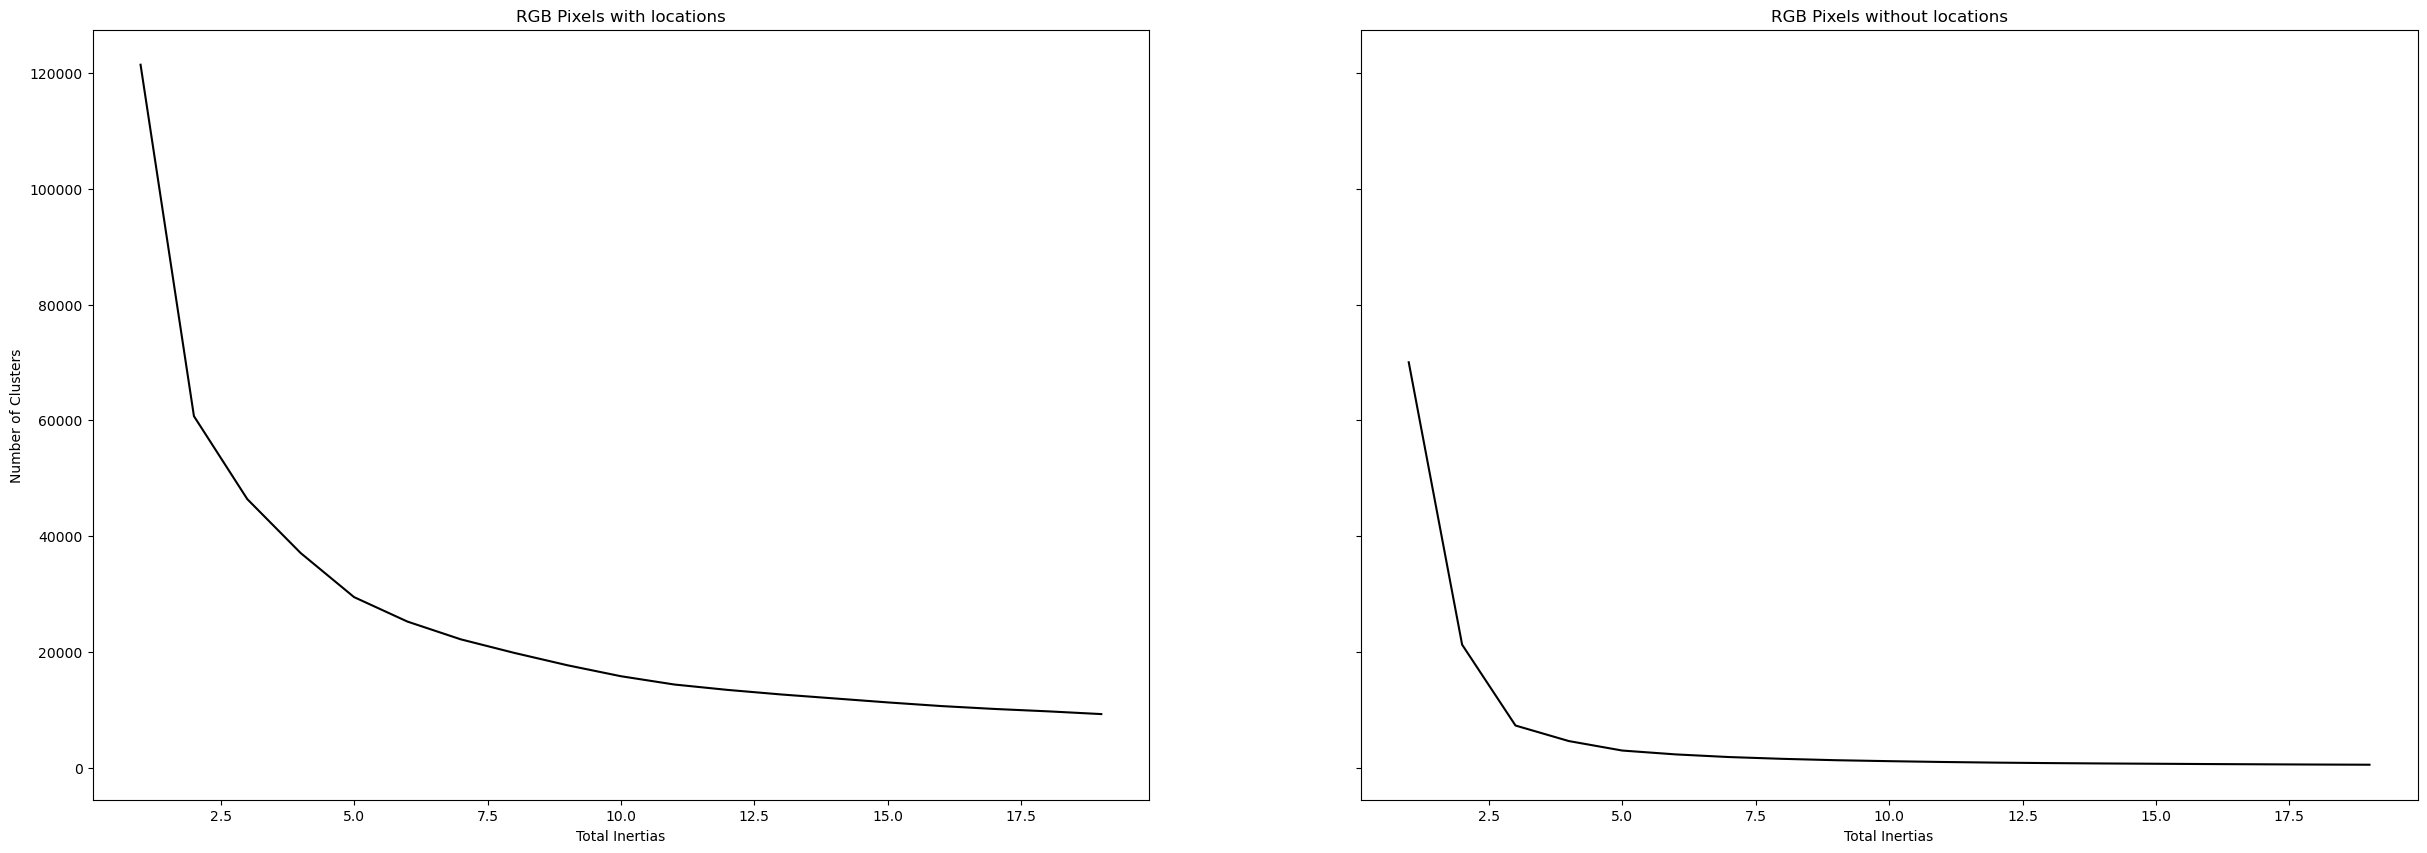

In [34]:
# Normalize Pixels to 0–1
nd_1 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_1)
nd_2 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_2)

# Elbow Method (Optimum Cluster Number Selection)
total_inertias_1 = [KMeans(n_clusters=i).fit(nd_1).inertia_ for i in range(1, 20)]
total_inertias_2 = [KMeans(n_clusters=i).fit(nd_2).inertia_ for i in range(1, 20)]
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(30,10))
ax1.plot(range(1, 20), total_inertias_1, c='black')
ax1.set(xlabel='Total Inertias', ylabel='Number of Clusters', title='RGB Pixels with locations')
ax2.plot(range(1, 20), total_inertias_2, c='black')
ax2.set(xlabel='Total Inertias', title='RGB Pixels without locations');
plt.savefig('elbow_result.jpg')

As we can see above results, I decided to choose 5 for thr first and 3 for the second. It is hard to distinguish the elbow part for the first part because graphic descends very smoothly. So we make our choice intuitively. The second one is more clear.

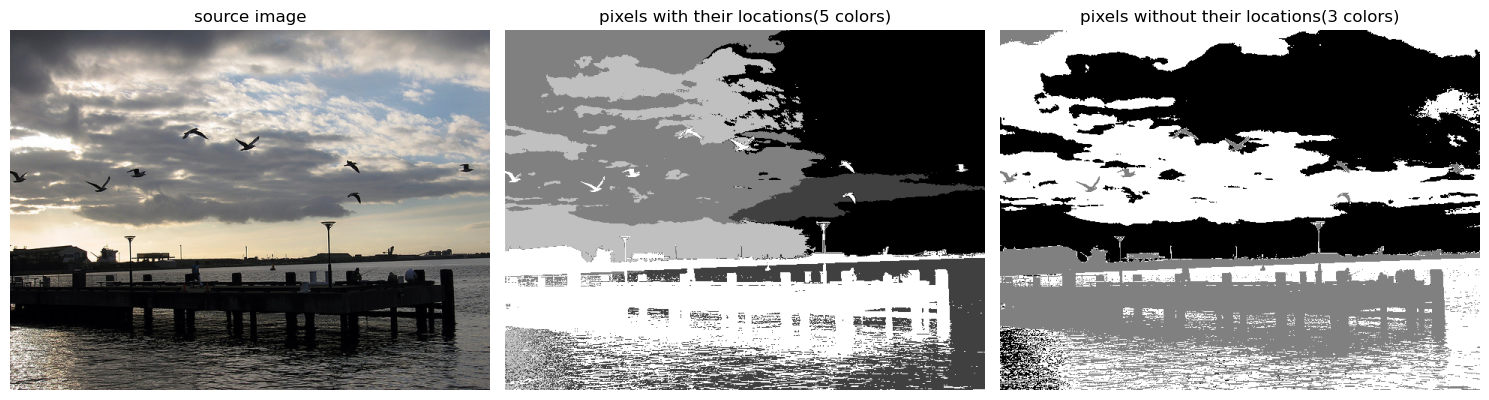

In [35]:
# k=5 for pixels with their locations
kmeans_elbow = KMeans(n_clusters=5)
kmeans_elbow.fit(nd_1)
labels_5 = kmeans_elbow.labels_
labels_5 = labels_5.reshape(img_kmeans_rgb.shape[:2])

# k=3 for pixels without their locations
kmeans_elbow_3 = KMeans(n_clusters=3)
kmeans_elbow_3.fit(nd_2)
labels_3 = kmeans_elbow_3.labels_
labels_3 = labels_3.reshape(img_kmeans_rgb.shape[:2])

# visualize the result
plt_shape = [1,3]
images =[img_kmeans_rgb,labels_5,labels_3]
titles = ['source image','pixels with their locations(5 colors)','pixels without their locations(3 colors)']

plotimages(plt_shape,images,titles)

3) Using the same image as in 1, now apply the Mean-Shift clustering algorithm and report the results.


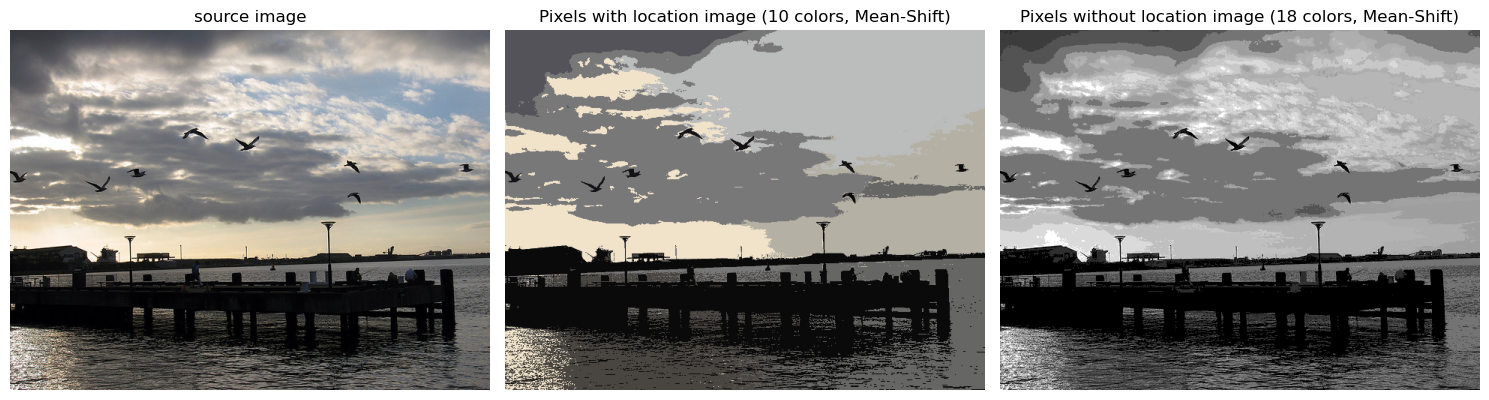

In [36]:
def recreate_image(centers, labels, image_size):
    """Recreate the quantized image from the code book and labels"""
    d = centers.shape[1]
    image = np.zeros((image_size[0], image_size[1], d))
    label_idx = 0
    for i in range(image_size[0]):
        for j in range(image_size[1]):
            image[i][j] = centers[labels[label_idx]]
            label_idx += 1
    return image

# Calculate the best bandwith which is specified by feature vector.
bandwidth_1 = estimate_bandwidth(nd_1, quantile=.04, n_jobs=-1)
bandwidth_2 = estimate_bandwidth(nd_2, quantile=.04, n_jobs=-1)

#Clustering
ms_1 = MeanShift(bandwidth = bandwidth_1 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_1)
ms_2 = MeanShift(bandwidth = bandwidth_2 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_2)

width = img_kmeans_rgb.shape[0]
height = img_kmeans_rgb.shape[1]
ms_1_image = recreate_image(ms_1.cluster_centers_[:, 2:], ms_1.labels_,(width,height))
ms_2_image = recreate_image(ms_2.cluster_centers_[:, 2:], ms_2.labels_,(width,height))

ms_1_title = "Pixels with location image ({} colors, Mean-Shift)".format(len(ms_1.cluster_centers_))

ms_2_title = "Pixels without location image ({} colors, Mean-Shift)".format(len(ms_2.cluster_centers_))


# visualize the result
plt_shape = [1,3]
images =[img_kmeans_rgb,ms_1_image,ms_2_image]
titles = ['source image',ms_1_title,ms_2_title]

plotimages(plt_shape,images,titles)


As we can see from above results, the image with the location information actually made the clustering process that we wanted, but the clustering process without location information is divided into too many clusters because it only use the color space as feature vector.

4) Explain some differences between K-means and Mean-Shift.

K-means and Mean-Shift are both clustering algorithms used for unsupervised learning. 

K-means requires the number of clusters to be specified in advance and uses a centroid-based approach to cluster data, while Mean-Shift automatically determines the number of clusters and uses a density-based approach. 

K-means is generally faster and more scalable, produces convex-shaped clusters, but is sensitive to outliers, while Mean-Shift is more robust to outliers, can produce clusters of any shape, but is slower and less scalable.

5) Explain some of their limitations.

Both algorithms have limitations that can impact their performance. One major limitation of K-means is its sensitivity to initialization. It can produce different results depending on the initial placement of the cluster centroids. Additionally, K-means is dependent on distance metrics and assumes that the clusters are convex-shaped. This can impact the results if the data is non-convex or if the chosen distance metric is not appropriate.

Mean-Shift is more robust to initialization than K-means but can be sensitive to the choice of bandwidth parameter and kernel function. It can also be computationally expensive for large datasets with many dimensions. Both K-means and Mean-Shift assume that the data points are clean and do not contain noise or outliers. Noise or outliers can significantly impact the results and may require additional preprocessing or outlier detection techniques.

References

[1] “Image Segmentation using K-means Clustering Algorithm and Mean-Shift
Clustering Algorithm”,
https://medium.com/@muhammetbolat/image-segmentation-using-k-means-
clustering-algorithm-and-mean-shift-clustering-algorithm-fb6ebe4cb761
[2] “Image Thresholding”
https://docs.opencv.org/3.4/d7/dd0/tutorial_js_thresholding.html
[3] “Contour Detection using OpenCV (Python/C++)”
https://learnopencv.com/contour-detection-using-opencv-python-c/#Steps-for-
Finding-and-Drawing-Contours-in-OpenCV